# <font color='darkgreen'>Applied data science capstone- final assignment project</font>

---

## <font color='green'>Introduction</font>

Traffic accidents have an adverse effect both on an individual and societal level resulting in costs due to person injuries and property damage, increased travel times and emissions due to congestion.

Although the outcome of one accident can be very different to another, the underlying cause can be very similar. Roads shrouded in dense fog can make driving incredibly dangerous, limiting visibility of the looming road ahead. Large amounts of rain or snowfall can also provide treacherous driving conditions which will affect a great number of road users.

The question is:

### <i>Given the weather and the road conditions- what is the possibility of a person getting into a car accident and how severe it would be, so that he/she would drive more carefully or even change his/her travel if he/she is able to.</i>

#### Target audience for the presented research will be all of the people with the driving license.

---

## <font color='green'>Data description</font>

#### High level description

The dataset covers all types collisions (events gathered from 2004 till now) provided with such information as severity of the accident, weather or an indication, that the accident involved hitting the parked car or whether the driver was under the influence of drug or alcohol (to distingush accidents that not neccessarily have to be connected with weather conditions).

#### Features details

<b>SEVERITYCODE</b>- a code that corresponds to the severity of the collision: 3-fatality;2b-serious injury;2-injury;1-prop damage;0-unknown<br>
<b>UNDERINFL</b>- whether or not a driver involved was under the influence of drugs or alcohol<br>
<b>WEATHER</b>- a description of the weather conditions during the time of the collision<br>
<b>ROADCOND</b>- the condition of the road during the collision<br>
<b>LIGHTCOND</b>- the light conditions during the collision<br>
<b>SPEEDING</b>- whether or not speeding was a factor in the collision<br>
<b>HITPARKEDCAR</b>- whether or not the collision involved hitting a parked car<br>
<b>INATTENTIONIND</b>- whether or not collision was due to innatention<br>
<b>PERSONCOUNT</b>- the total number of people involved in the collision

#### Example

df[4:5]

Example shown above illustrates the incident resulting with injuries. No parked vehicles were taking part in the event and speeding or drugs/alcohol were not the reason. Incident occured in the daylight, but probably wet road conditions and rainy weather were the root cause.

---

## <font color='green'>Data preparation</font>

### Importing necessary modules

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

### Reading the input dataset

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
fullcoll_df = pd.read_csv(body)
fullcoll_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### We are searching for the accidents, initiated by the motor vehicle, therefore the best approach would be to filter 'ST_COLDESC' (short incidents descriptions) column to pick only motor vehicle accidents

In [4]:
fullcoll_df.shape

(194673, 38)

In [5]:
fullcoll_df['SDOT_COLDESC'].unique()

array(['MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END',
       'PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE',
       'MOTOR VEHICLE STRUCK OBJECT IN ROAD',
       'MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT',
       'MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE',
       'DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END',
       'NOT ENOUGH INFORMATION / NOT APPLICABLE',
       'MOTOR VEHCILE STRUCK PEDESTRIAN',
       'PEDALCYCLIST OVERTURNED IN ROAD',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE',
       'MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END',
       'MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE',
       'MOTOR VEHICLE OVERTURNED IN ROAD',
       'MOTOR VEHICLE RAN OFF ROAD - NO COLLISION',
       'DRIVERLESS VEHICLE RAN OFF ROAD - HIT F

In [6]:
fullcoll_df['SDOT_COLDESC'].isnull().sum()

0

In [7]:
fullcoll_df=fullcoll_df.loc[fullcoll_df['SDOT_COLDESC'].str.contains(pat="^MOTOR")]

In [8]:
fullcoll_df['SDOT_COLDESC'].unique()

array(['MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE',
       'MOTOR VEHICLE STRUCK OBJECT IN ROAD',
       'MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT',
       'MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE',
       'MOTOR VEHCILE STRUCK PEDESTRIAN',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE',
       'MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END',
       'MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE',
       'MOTOR VEHICLE OVERTURNED IN ROAD',
       'MOTOR VEHICLE RAN OFF ROAD - NO COLLISION',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE',
       'MOTOR VEHICLE STRUCK TRAIN',
       'MOTOR VEHICLE STRUCK PEDALCYCLIST, RIGHT SIDE SIDESWIPE'],
      dtype=object)

### Picking needed columns

In [9]:
df=fullcoll_df[['WEATHER','SEVERITYCODE','ROADCOND','LIGHTCOND','SPEEDING','HITPARKEDCAR','UNDERINFL','INATTENTIONIND','PERSONCOUNT']]
df.head()

,WEATHER,SEVERITYCODE,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,UNDERINFL,INATTENTIONIND,PERSONCOUNT
0,Overcast,2,Wet,Daylight,NaN,N,N,NaN,2
1,Raining,1,Wet,Dark - Street Lights On,NaN,N,0,NaN,2
2,Overcast,1,Dry,Daylight,NaN,N,0,NaN,4
3,Clear,1,Dry,Daylight,NaN,N,N,NaN,3
4,Raining,2,Wet,Daylight,NaN,N,0,NaN,2


### Counting null values

In [10]:
print(df.isnull().sum())
print(df.shape)

WEATHER             4224
SEVERITYCODE           0
ROADCOND            4155
LIGHTCOND           4294
SPEEDING          173510
HITPARKEDCAR           0
UNDERINFL           4045
INATTENTIONIND    153858
PERSONCOUNT            0
dtype: int64
(182620, 9)


### Results show most NULL values in the Speeding and Inattentionind columns, but it is proven below, that these should be replaced by 'N' (as the only remaining value is 'Y')

In [11]:
print('Unique values for the WEATHER:\n%s\n'% df['WEATHER'].unique())
print('Unique values for the SEVERITYCODE:\n%s\n'% df['SEVERITYCODE'].unique())
print('Unique values for the ROADCOND:\n%s\n'% df['ROADCOND'].unique())
print('Unique values for the LIGHTCOND:\n%s\n'% df['LIGHTCOND'].unique())
print('Unique values for the SPEEDING:\n%s\n'% df['SPEEDING'].unique())
print('Unique values for the HITPARKEDCAR:\n%s\n'% df['HITPARKEDCAR'].unique())
print('Unique values for the UNDERINFL:\n%s\n'% df['UNDERINFL'].unique())
print('Unique values for the INATTENTIONIND:\n%s\n'% df['INATTENTIONIND'].unique())
print('Unique values for the PERSONCOUNT:\n%s\n'% df['PERSONCOUNT'].unique())

Unique values for the WEATHER:
['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']

Unique values for the SEVERITYCODE:
[2 1]

Unique values for the ROADCOND:
['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']

Unique values for the LIGHTCOND:
['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' nan
 'Unknown' 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']

Unique values for the SPEEDING:
[nan 'Y']

Unique values for the HITPARKEDCAR:
['N' 'Y']

Unique values for the UNDERINFL:
['N' '0' nan '1' 'Y']

Unique values for the INATTENTIONIND:
[nan 'Y']

Unique values for the PERSONCOUNT:
[ 2  4  3  0  1  5  6 16  8  7 11  9 12 17 26 22 10 37 13 36 28 14 53 19
 30 29 23 44 15 32 21 41 27 20 35 43 81 18 25 48 24 34 57 39 47 54 31]



### After finding unique labels, when it comes to the severity, we are dealing only with injuries or property damage. We need to remove 'Other' ánd 'Unknown' road conditions as they are not informative enough. The same goes for 'nan','Unknown' and 'Óther' light conditions and 'nan','Other' and 'Unknown' in the 'Weather' column. In the column 'Speeding', we are dealing only with 'nan' or 'Y'- therefore we can assume, that 'nan' can be replaced by 'N'- we need to treat the data from 'INATTENTIONIND' analogically. In the column 'Underinfl' we need to remove 'nan' values, replace 0 with 'N' and 1 with 'Y'.

In [12]:
df['INATTENTIONIND'].fillna('N',inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [13]:
df['SPEEDING'].fillna('N',inplace=True)

In [14]:
df['UNDERINFL'].replace(to_replace="0", value="N",inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [15]:
df['UNDERINFL'].replace(to_replace="1", value="Y",inplace=True)

In [16]:
df.head()

,WEATHER,SEVERITYCODE,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,UNDERINFL,INATTENTIONIND,PERSONCOUNT
0,Overcast,2,Wet,Daylight,N,N,N,N,2
1,Raining,1,Wet,Dark - Street Lights On,N,N,N,N,2
2,Overcast,1,Dry,Daylight,N,N,N,N,4
3,Clear,1,Dry,Daylight,N,N,N,N,3
4,Raining,2,Wet,Daylight,N,N,N,N,2


In [17]:
df=df.dropna(subset=df.columns)
df=df.loc[df['ROADCOND'] != 'Other']
df=df.loc[df['ROADCOND'] != 'Unknown']
df=df.loc[df['LIGHTCOND'] != 'Unknown']
df=df.loc[df['LIGHTCOND'] != 'Other']
df=df.loc[df['WEATHER'] != 'Unknown']
df=df.loc[df['WEATHER'] != 'Other']

In [18]:
df.shape

(164154, 9)

### We are excluding incidents associated with drugs/alcohol, as the main reason for these is not associated with the weather conditions

In [19]:
df=df.loc[df['UNDERINFL'] == 'N']
df=df.drop(['UNDERINFL'],axis=1)

In [20]:
df.shape

(155368, 8)

### We are minimizing the light conditions labels, as they don't not provide much additional information to the research

In [21]:
df['LIGHTCOND'].replace('Daylight','Day',inplace=True)
df['LIGHTCOND'].replace('Dusk','Day',inplace=True)
df['LIGHTCOND'].replace('Dark - Street Lights On','Night',inplace=True)
df['LIGHTCOND'].replace('Dark - No Street Lights','Night',inplace=True)
df['LIGHTCOND'].replace('Dawn','Night',inplace=True)
df['LIGHTCOND'].replace('Dark - Street Lights Off','Night',inplace=True)
df['LIGHTCOND'].replace('Dark - Unknown Lighting','Night',inplace=True)

### We are getting rid of the redundant weather and road conditions

In [22]:
df['ROADCOND'].replace('Standing Water','Wet',inplace=True)
df['WEATHER'].replace('Overcast','Cloudy',inplace=True)
df['WEATHER'].replace('Partly Cloudy','Cloudy',inplace=True)

In [23]:
df.head()

,WEATHER,SEVERITYCODE,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,INATTENTIONIND,PERSONCOUNT
0,Cloudy,2,Wet,Day,N,N,N,2
1,Raining,1,Wet,Night,N,N,N,2
2,Cloudy,1,Dry,Day,N,N,N,4
3,Clear,1,Dry,Day,N,N,N,3
4,Raining,2,Wet,Day,N,N,N,2


In [24]:
print('Unique values for the WEATHER:\n%s\n'% df['WEATHER'].unique())
print('Unique values for the SEVERITYCODE:\n%s\n'% df['SEVERITYCODE'].unique())
print('Unique values for the ROADCOND:\n%s\n'% df['ROADCOND'].unique())
print('Unique values for the LIGHTCOND:\n%s\n'% df['LIGHTCOND'].unique())
print('Unique values for the SPEEDING:\n%s\n'% df['SPEEDING'].unique())
print('Unique values for the HITPARKEDCAR:\n%s\n'% df['HITPARKEDCAR'].unique())
print('Unique values for the INATTENTIONIND:\n%s\n'% df['INATTENTIONIND'].unique())

Unique values for the WEATHER:
['Cloudy' 'Raining' 'Clear' 'Snowing' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind']

Unique values for the SEVERITYCODE:
[2 1]

Unique values for the ROADCOND:
['Wet' 'Dry' 'Snow/Slush' 'Ice' 'Sand/Mud/Dirt' 'Oil']

Unique values for the LIGHTCOND:
['Day' 'Night']

Unique values for the SPEEDING:
['N' 'Y']

Unique values for the HITPARKEDCAR:
['N' 'Y']

Unique values for the INATTENTIONIND:
['N' 'Y']



### In terms of predicting the probability of the person getting into a car accident we need to add another column, which- based on the PERSONCOUNT column will tell us, whether people were involved or not.

In [25]:
df=df.loc[df['WEATHER'] != 'Cloudy']
df.shape

(130676, 8)

In [26]:
df=df.loc[df['ROADCOND'] != 'Oil']
df.shape

(130627, 8)

In [27]:
df['PPLINVOLVED']=np.where(df['PERSONCOUNT']== 0, 'N', 'Y')

In [28]:
df.drop('PERSONCOUNT',axis=1,inplace=True)

### Converting string labels to numerical values together with data types cast

In [29]:
df=df.replace({'Y':'1','N':'0'})
df=df.replace({'Day':'1','Night':'0'})

df['SEVERITYCODE'].replace({1:0}, inplace=True) #converting labels to the more consistent binary format
df['SEVERITYCODE'].replace({2:1}, inplace=True) #converting labels to the more consistent binary format
df.head()

,WEATHER,SEVERITYCODE,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,INATTENTIONIND,PPLINVOLVED
1,Raining,0,Wet,0,0,0,0,1
3,Clear,0,Dry,1,0,0,0,1
4,Raining,1,Wet,1,0,0,0,1
5,Clear,0,Dry,1,0,0,0,1
6,Raining,0,Wet,1,0,0,0,1


In [30]:
df['WEATHER'].replace('Sleet/Hail/Freezing Rain','Raining',inplace=True)
df['WEATHER'].replace('Blowing Sand/Dirt','Windy',inplace=True)
df['WEATHER'].replace('Severe Crosswind','Windy',inplace=True)

In [31]:
df['WEATHER'].value_counts()

Clear             99181
Raining           30127
Snowing             765
Fog/Smog/Smoke      492
Windy                62
Name: WEATHER, dtype: int64

In [32]:
df=df.loc[df['WEATHER'] != 'Windy']

In [33]:
df['ROADCOND'].value_counts()

Dry              96139
Wet              32941
Ice                798
Snow/Slush         647
Sand/Mud/Dirt       40
Name: ROADCOND, dtype: int64

In [34]:
df=df.loc[df['ROADCOND'] != 'Sand/Mud/Dirt']

In [35]:
print('Unique values for the WEATHER:\n%s\n'% df['WEATHER'].unique())
print('Unique values for the SEVERITYCODE:\n%s\n'% df['SEVERITYCODE'].unique())
print('Unique values for the ROADCOND:\n%s\n'% df['ROADCOND'].unique())
print('Unique values for the LIGHTCOND:\n%s\n'% df['LIGHTCOND'].unique())
print('Unique values for the SPEEDING:\n%s\n'% df['SPEEDING'].unique())
print('Unique values for the HITPARKEDCAR:\n%s\n'% df['HITPARKEDCAR'].unique())
print('Unique values for the INATTENTIONIND:\n%s\n'% df['INATTENTIONIND'].unique())


Unique values for the WEATHER:
['Raining' 'Clear' 'Snowing' 'Fog/Smog/Smoke']

Unique values for the SEVERITYCODE:
[0 1]

Unique values for the ROADCOND:
['Wet' 'Dry' 'Snow/Slush' 'Ice']

Unique values for the LIGHTCOND:
['0' '1']

Unique values for the SPEEDING:
['0' '1']

Unique values for the HITPARKEDCAR:
['0' '1']

Unique values for the INATTENTIONIND:
['0' '1']



In [36]:
df=df.join(pd.get_dummies(df['WEATHER']))

In [37]:
roadcond=pd.get_dummies(df['ROADCOND'])
roadcond.rename(columns={'Wet':'ROAD_Wet', 'Dry':'ROAD_Dry', 'Snow/Slush':'ROAD_Snow', 'Ice':'ROAD_Ice', 'Sand/Mud/Dirt':'ROAD_Mud', 'Oil':'ROAD_Oil'}, inplace=True)
df.drop('WEATHER',axis=1,inplace=True)
df.drop('ROADCOND',axis=1,inplace=True)

In [38]:
df=df.join(roadcond)

In [39]:
df=df.astype('int64')
df.columns
df.head()

,SEVERITYCODE,LIGHTCOND,SPEEDING,HITPARKEDCAR,INATTENTIONIND,PPLINVOLVED,Clear,Fog/Smog/Smoke,Raining,Snowing,ROAD_Dry,ROAD_Ice,ROAD_Snow,ROAD_Wet
1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,0,1,0,0,0,1,1,0,0,0,1,0,0,0
4,1,1,0,0,0,1,0,0,1,0,0,0,0,1
5,0,1,0,0,0,1,1,0,0,0,1,0,0,0
6,0,1,0,0,0,1,0,0,1,0,0,0,0,1


### We need to divide our dataset into 2 parts: prediction of the <u>car accident involving people</u>, depending on the weather and road conditions, and prediction of the <u>car accident severity</u>, depending on the weather and road conditions.

In [52]:
dfsev=df.loc[df['PPLINVOLVED'] == 1]

Xppl=np.asarray(df[['Clear','Fog/Smog/Smoke','Raining','Snowing','ROAD_Dry','ROAD_Ice','ROAD_Snow','ROAD_Wet']])

Xsev=np.asarray(dfsev[['Clear','Fog/Smog/Smoke','Raining','Snowing','ROAD_Dry','ROAD_Ice','ROAD_Snow','ROAD_Wet']])

Yppl=np.asarray(df['PPLINVOLVED'])

Ysev=np.asarray(dfsev['SEVERITYCODE'])


0    88258
1    42267
Name: SEVERITYCODE, dtype: int64
1    126079
0      4446
Name: PPLINVOLVED, dtype: int64


(130525, 14)

In [53]:
from sklearn.model_selection import train_test_split
Xppl_train, Xppl_test, Yppl_train, Yppl_test = train_test_split( Xppl, Yppl, test_size=0.2, random_state=4)
print ('Train set:', Xppl_train.shape,  Yppl_train.shape)
print ('Test set:', Xppl_test.shape,  Yppl_test.shape)

Train set: (104420, 8) (104420,)
Test set: (26105, 8) (26105,)


In [54]:
Xsev_train, Xsev_test, Ysev_train, Ysev_test = train_test_split( Xsev, Ysev, test_size=0.2, random_state=4)
print ('Train set:', Xsev_train.shape,  Ysev_train.shape)
print ('Test set:', Xsev_test.shape,  Ysev_test.shape)

Train set: (100863, 8) (100863,)
Test set: (25216, 8) (25216,)


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR1 = LogisticRegression(C=0.01, solver='sag',multi_class='ovr',fit_intercept=False).fit(Xppl_train,Yppl_train)
LR1

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR2 = LogisticRegression(C=0.01, solver='sag',multi_class='ovr',fit_intercept=False).fit(Xsev_train,Ysev_train)
LR2

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [99]:
yhat = LR1.predict(Xppl_test)
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Yppl_test, yhat)

0.9655238460065122

In [100]:
yhat2 = LR2.predict(Xsev_test)
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Ysev_test, yhat2)

0.679251269035533

In [101]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Yppl_test, yhat, labels=[1,0]))

[[25205     0]
 [  900     0]]


Confusion matrix, without normalization
[[25205     0]
 [  900     0]]


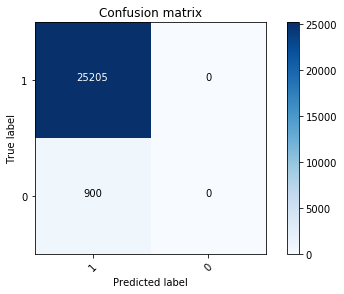

In [102]:
plot_confusion_matrix(confusion_matrix(Yppl_test, yhat, labels=[1,0]),[1,0],normalize=False)

In [103]:
print(confusion_matrix(Ysev_test, yhat2, labels=[1,0]))

[[    0  8088]
 [    0 17128]]


Confusion matrix, without normalization
[[    0  8088]
 [    0 17128]]


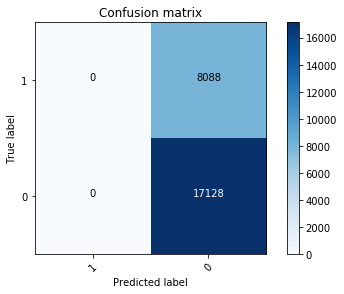

In [104]:
plot_confusion_matrix(confusion_matrix(Ysev_test, yhat2, labels=[1,0]),[1,0],normalize=False)

In [93]:
from sklearn.metrics import classification_report
print (classification_report(Yppl_test, yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       900
           1       0.97      1.00      0.98     25205

   micro avg       0.97      0.97      0.97     26105
   macro avg       0.48      0.50      0.49     26105
weighted avg       0.93      0.97      0.95     26105



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [94]:
print (classification_report(Ysev_test, yhat2))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81     17128
           1       0.00      0.00      0.00      8088

   micro avg       0.68      0.68      0.68     25216
   macro avg       0.34      0.50      0.40     25216
weighted avg       0.46      0.68      0.55     25216



In [105]:
yhat_prob = LR1.predict_proba(Xppl_test)
yhat_prob

array([[0.03915326, 0.96084674],
       [0.03915326, 0.96084674],
       [0.03915326, 0.96084674],
       ...,
       [0.03915326, 0.96084674],
       [0.03915326, 0.96084674],
       [0.03100459, 0.96899541]])

In [106]:
yhat2_prob = LR2.predict_proba(Xsev_test)
yhat2_prob

array([[0.67754642, 0.32245358],
       [0.66227156, 0.33772844],
       [0.67754642, 0.32245358],
       ...,
       [0.67754642, 0.32245358],
       [0.67754642, 0.32245358],
       [0.67754642, 0.32245358]])

In [107]:
from sklearn.metrics import log_loss
log_loss(Yppl_test, yhat_prob)

0.15089624671231222

In [108]:
log_loss(Ysev_test, yhat2_prob)

0.6272198107215652

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)

# wykresy z martlpotliba dla niektorych atrybutow